In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import plot_confusion_matrix

In [3]:
df = pd.read_csv("titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df1 = pd.read_csv("titanic_test.csv")
df1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
#dropping Name,Ticket as they have no significance in any ML model's performance. Even cabin tho dubious
del df['Name']
del df['Ticket']
del df['Cabin']
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [10]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [11]:
df[df.Parch != 0]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
7,8,0,3,male,2.0,3,1,21.0750,S
8,9,1,3,female,27.0,0,2,11.1333,S
10,11,1,3,female,4.0,1,1,16.7000,S
13,14,0,3,male,39.0,1,5,31.2750,S
16,17,0,3,male,2.0,4,1,29.1250,Q
...,...,...,...,...,...,...,...,...,...
871,872,1,1,female,47.0,1,1,52.5542,S
879,880,1,1,female,56.0,0,1,83.1583,C
880,881,1,2,female,25.0,0,1,26.0000,S
885,886,0,3,female,39.0,0,5,29.1250,Q


In [12]:
dummies = []
cols = ['Pclass', 'Sex', 'Embarked']
for col in cols:
    dummies.append(pd.get_dummies(df[col]))

In [13]:
print(type(dummies))

<class 'list'>


In [14]:
print(dummies[0])
print(dummies[1])
print(dummies[2])

     1  2  3
0    0  0  1
1    1  0  0
2    0  0  1
3    1  0  0
4    0  0  1
..  .. .. ..
886  0  1  0
887  1  0  0
888  0  0  1
889  1  0  0
890  0  0  1

[891 rows x 3 columns]
     female  male
0         0     1
1         1     0
2         1     0
3         1     0
4         0     1
..      ...   ...
886       0     1
887       1     0
888       1     0
889       0     1
890       0     1

[891 rows x 2 columns]
     C  Q  S
0    0  0  1
1    1  0  0
2    0  0  1
3    0  0  1
4    0  0  1
..  .. .. ..
886  0  0  1
887  0  0  1
888  0  0  1
889  1  0  0
890  0  1  0

[891 rows x 3 columns]


In [15]:
titanic_dummies = pd.concat(dummies,axis=1)

In [16]:
print(type(titanic_dummies))
print(titanic_dummies)

<class 'pandas.core.frame.DataFrame'>
     1  2  3  female  male  C  Q  S
0    0  0  1       0     1  0  0  1
1    1  0  0       1     0  1  0  0
2    0  0  1       1     0  0  0  1
3    1  0  0       1     0  0  0  1
4    0  0  1       0     1  0  0  1
..  .. .. ..     ...   ... .. .. ..
886  0  1  0       0     1  0  0  1
887  1  0  0       1     0  0  0  1
888  0  0  1       1     0  0  0  1
889  1  0  0       0     1  1  0  0
890  0  0  1       0     1  0  1  0

[891 rows x 8 columns]


In [17]:
del df['Sex']
del df['Pclass']
del df['Embarked']


In [18]:
df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare
0,1,0,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,1,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,0,35.0,0,0,8.0500


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Age          714 non-null    float64
 3   SibSp        891 non-null    int64  
 4   Parch        891 non-null    int64  
 5   Fare         891 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 41.9 KB


In [20]:
df = pd.concat((df,titanic_dummies),axis=1)
print(df)

     PassengerId  Survived   Age  SibSp  Parch     Fare  1  2  3  female  \
0              1         0  22.0      1      0   7.2500  0  0  1       0   
1              2         1  38.0      1      0  71.2833  1  0  0       1   
2              3         1  26.0      0      0   7.9250  0  0  1       1   
3              4         1  35.0      1      0  53.1000  1  0  0       1   
4              5         0  35.0      0      0   8.0500  0  0  1       0   
..           ...       ...   ...    ...    ...      ... .. .. ..     ...   
886          887         0  27.0      0      0  13.0000  0  1  0       0   
887          888         1  19.0      0      0  30.0000  1  0  0       1   
888          889         0   NaN      1      2  23.4500  0  0  1       1   
889          890         1  26.0      0      0  30.0000  1  0  0       0   
890          891         0  32.0      0      0   7.7500  0  0  1       0   

     male  C  Q  S  
0       1  0  0  1  
1       0  1  0  0  
2       0  0  0  1  
3  

In [21]:
df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,1,2,3,female,male,C,Q,S
0,1,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,5,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [22]:
df['Age'] = df['Age'].interpolate()

In [23]:
df[df.Age>0]

,PassengerId,Survived,Age,SibSp,Parch,Fare,1,2,3,female,male,C,Q,S
0,1,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,5,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,27.0,0,0,13.0000,0,1,0,0,1,0,0,1
887,888,1,19.0,0,0,30.0000,1,0,0,1,0,0,0,1
888,889,0,22.5,1,2,23.4500,0,0,1,1,0,0,0,1
889,890,1,26.0,0,0,30.0000,1,0,0,0,1,1,0,0


In [25]:
y = df['Survived'].to_numpy()
print(y.shape)


(891,)


In [26]:
df2 = df
del df2['Survived']
df2.head()

,PassengerId,Age,SibSp,Parch,Fare,1,2,3,female,male,C,Q,S
0,1,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,2,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,3,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,4,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,5,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [27]:
del df2['PassengerId']
df2.head()

,Age,SibSp,Parch,Fare,1,2,3,female,male,C,Q,S
0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [28]:
df2.shape

(891, 12)

In [29]:
X = df2.to_numpy()
print(X.shape)

(891, 12)


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

In [31]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(623, 12)
(623,)
(268, 12)
(268,)


In [32]:
print(y_train)

[1 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 1
 1 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0
 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1
 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1
 1 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1
 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 0 0
 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 0 1
 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0
 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1
 0 0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0
 0 0 1 0 0 0 0 1 1 1 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 1 1
 1 0 1 1 1 0 0 0 1 0 0 0 

In [33]:
gnb = GaussianNB()
gnb_model = gnb.fit(X_train,y_train)
y_pred = gnb_model.predict(X_test)

In [34]:
print(y_pred.shape)
print(y_pred)

(268,)
[0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0
 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1 1 0 1 0
 1 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1
 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0
 0 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0
 0 0 0 0 0 0 0 1 1]


In [35]:
count = 0

#finding the accuracy
for i in range(0,X_test.shape[0]):
    if(y_pred[i] != y_test[i]):
        count = count + 1;
        
print("The number of misclassified inputs in X_test are: %d" % count)

The number of misclassified inputs in X_test are: 61


In [36]:
acc = (1 - (count/X_test.shape[0])) * 100
print("Accuracy of the Gaussian Naive Bayes Classifier is: %f" %acc)

Accuracy of the Gaussian Naive Bayes Classifier is: 77.238806


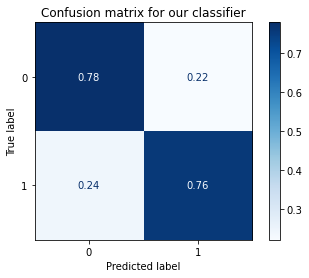

In [37]:
matrix = plot_confusion_matrix(gnb_model, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for our classifier')
plt.show(matrix)
plt.show()

In [165]:
#Do Females have a higher survivability rate than Males - They should technically
df.head()
del df['PassengerId']
df.head()

,Survived,Age,SibSp,Parch,Fare,1,2,3,female,male,C,Q,S
0,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [168]:
df[df.Age > 0]

,Survived,Age,SibSp,Parch,Fare,1,2,3,female,male,C,Q,S
0,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,0,1,0,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,1,0,0,0,1
888,0,22.5,1,2,23.4500,0,0,1,1,0,0,0,1
889,1,26.0,0,0,30.0000,1,0,0,0,1,1,0,0


In [184]:
f = 0
for i in range(0,df.shape[0]):
    if(df.iloc[i,0] == 1 and df.iloc[i,8] == 1):
        f = f+1
        
survivability_rate_women = (f/df[df.female == 1].shape[0])*100
print("Survivability rate for women: %f" % survivability_rate_women)

Survivability rate for women: 74.203822


In [188]:
m = 0
for i in range(0,df.shape[0]):
    if(df.iloc[i,0] == 1 and df.iloc[i,9] == 1):
        m = m+1
        
survivability_rate_men = (m/df[df.male == 1].shape[0])*100
print("Survivability rate for men: %f" % survivability_rate_men)

Survivability rate for men: 18.890815


In [183]:
#children

df[df.Age < 16]

,Survived,Age,SibSp,Parch,Fare,1,2,3,female,male,C,Q,S
7,0,2.000,3,1,21.0750,0,0,1,0,1,0,0,1
9,1,14.000,1,0,30.0708,0,1,0,1,0,1,0,0
10,1,4.000,1,1,16.7000,0,0,1,1,0,0,0,1
14,0,14.000,0,0,7.8542,0,0,1,1,0,0,0,1
16,0,2.000,4,1,29.1250,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,0,11.915,0,0,7.2292,0,0,1,0,1,1,0,0
850,0,4.000,4,2,31.2750,0,0,1,0,1,0,0,1
852,0,9.000,1,1,15.2458,0,0,1,1,0,1,0,0
869,1,4.000,1,1,11.1333,0,0,1,0,1,0,0,1


In [189]:
c = 0
for i in range(0,df.shape[0]):
    if(df.iloc[i,0] == 1 and df.iloc[i,1] < 16):
        c = c+1
        
survivability_rate_children = (c/df[df.Age < 16].shape[0])*100
print("Survivability rate for children: %f" % survivability_rate_children)

Survivability rate for children: 54.545455


In [200]:
#male children
mc = 0
for i in range(0,df.shape[0]):
    if(df.iloc[i,0] == 1 and df.iloc[i,1] < 16 and df.iloc[i,9] == 1):
        mc = mc+1

print(mc)
df_children = df[df.Age < 16]
no_of_mc = df_children[df_children.male == 1].shape[0]
print(no_of_mc)
survivability_rate_male_children = (mc/no_of_mc)*100
print("Survivability rate for male children: %f" % survivability_rate_male_children)

23
53
Survivability rate for male children: 43.396226


In [204]:
df_children = df[df.Age < 16]
df_children.shape

(99, 13)

In [205]:
print(df_children[df_children.male == 1].shape[0])
print(df_children[df_children.female == 1].shape[0])

53
46


In [208]:
#female children
fc = 0
for i in range(0,df.shape[0]):
    if(df.iloc[i,0] == 1 and df.iloc[i,1] < 16 and df.iloc[i,8] == 1):
        fc = fc+1
print(fc)
no_of_fc = df_children[df_children.female == 1].shape[0]
print(no_of_fc)
survivability_rate_female_children = (fc/no_of_fc)*100
print("Survivability rate for female children: %f" % survivability_rate_female_children)

31
46
Survivability rate for female children: 67.391304


In [210]:
df_female = df[df.female == 1]
df_female.shape

(314, 13)

In [211]:
#Adult Women
af = 0
for i in range(0,df.shape[0]):
    if(df.iloc[i,0] == 1 and df.iloc[i,8] == 1 and df.iloc[i,1] > 15):
        af = af+1
        
print(af)
no_of_af = df_female[df_female.Age > 15].shape[0]
print(no_of_af)       
survivability_rate_adult_women = (af/no_of_af)*100
print("Survivability rate for adult women: %f" % survivability_rate_adult_women)

202
268
Survivability rate for adult women: 75.373134


In [212]:
df_male = df[df.male == 1]
df_male.shape

(577, 13)

In [213]:
#Adult men
am = 0
for i in range(0,df.shape[0]):
    if(df.iloc[i,0] == 1 and df.iloc[i,9] == 1 and df.iloc[i,1] > 15):
        am = am+1
        
print(am)
no_of_am = df_male[df_male.Age > 15].shape[0]
print(no_of_am)       
survivability_rate_adult_men = (am/no_of_am)*100
print("Survivability rate for adult men: %f" % survivability_rate_adult_men)

86
525
Survivability rate for adult men: 16.380952


In [215]:
525+268+46+53

892